# Importing of Libraries and Data

We import all the necessary libraries and dataset. Also visualize our data to see what type of data we are dealing with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
single_image.shape

(28, 28)

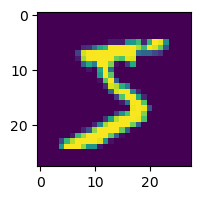

In [118]:
plt.figure(figsize=(2,2))
plt.imshow(single_image)

# Preprocessing of Data

We need to make sure our labels is understood by CNN

## LABELS

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand.

In [20]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train.shape

(60000,)

In [26]:
y_cat_train = to_categorical(y_train,10)

In [24]:
y_cat_test = to_categorical(y_test,10)

In [28]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Processing of X data

We should normalize our X data

In [38]:
single_image.max()

255

In [40]:
single_image.min()

0

In [42]:
x_train = x_train/255
x_test = x_test/255

In [44]:
scaled_single = x_train[0]

In [46]:
scaled_single.max()

1.0

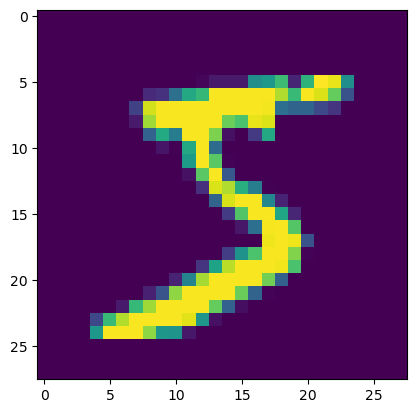

In [48]:
plt.imshow(scaled_single)

## Reshaping of Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and whiel), an color image would have 3 dimensions.

In [52]:
x_train.shape

(60000, 28, 28)

In [54]:
x_test.shape

(10000, 28, 28)

In [56]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [58]:
x_train.shape

(60000, 28, 28, 1)

In [60]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [65]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\PIYUSH LAHORI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [71]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.9160 - loss: 0.2871 - val_accuracy: 0.9774 - val_loss: 0.0672
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9796 - val_loss: 0.0588
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9908 - loss: 0.0289 - val_accuracy: 0.9837 - val_loss: 0.0499
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9868 - val_loss: 0.0376
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 0.9879 - val_loss: 0.0423
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9868 - val_loss: 0.0495


# Evaluate the Model

In [74]:
model.metrics_names

['loss', 'compile_metrics']

In [78]:
losses = pd.DataFrame(model.history.history)
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.958667,0.139124,0.9774,0.067153
1,0.985100,0.047951,0.9796,0.058836
2,0.989967,0.031258,0.9837,0.049851
3,0.992950,0.021625,0.9868,0.037583
4,0.994783,0.015833,0.9879,0.042298


<Axes: >

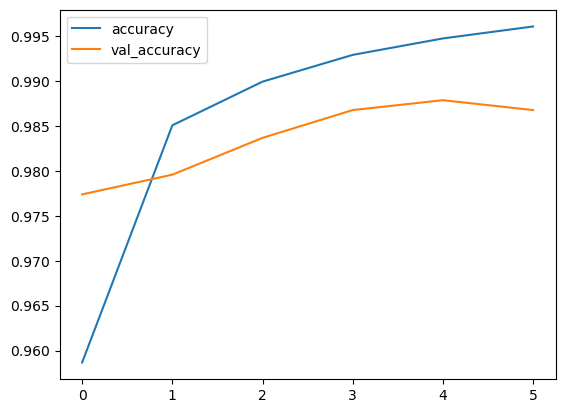

In [80]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

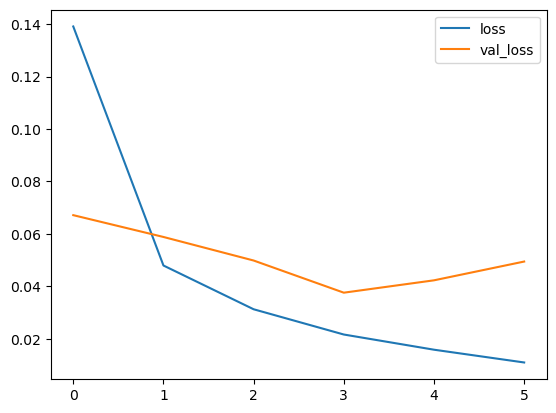

In [82]:
losses[['loss','val_loss']].plot()

In [84]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[0.04946011304855347, 0.9868000149726868]


In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
pred = model.predict(x_test)
predictions = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [94]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [96]:
predictions[0]

7

In [98]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [102]:
confusion_matrix(y_test,predictions)

array([[ 972,    1,    2,    1,    0,    0,    3,    0,    1,    0],
       [   0, 1125,    4,    0,    0,    1,    4,    1,    0,    0],
       [   1,    0, 1025,    0,    1,    0,    2,    3,    0,    0],
       [   0,    0,    4, 1003,    0,    2,    0,    1,    0,    0],
       [   0,    0,    0,    0,  970,    0,    2,    0,    0,   10],
       [   1,    0,    0,    6,    0,  881,    4,    0,    0,    0],
       [   1,    1,    1,    0,    1,    1,  952,    0,    1,    0],
       [   0,    1,   12,    0,    0,    0,    0, 1013,    1,    1],
       [   3,    1,   15,    4,    1,    0,    2,    4,  938,    6],
       [   1,    2,    2,    2,    3,    6,    0,    4,    0,  989]],
      dtype=int64)

<Axes: >

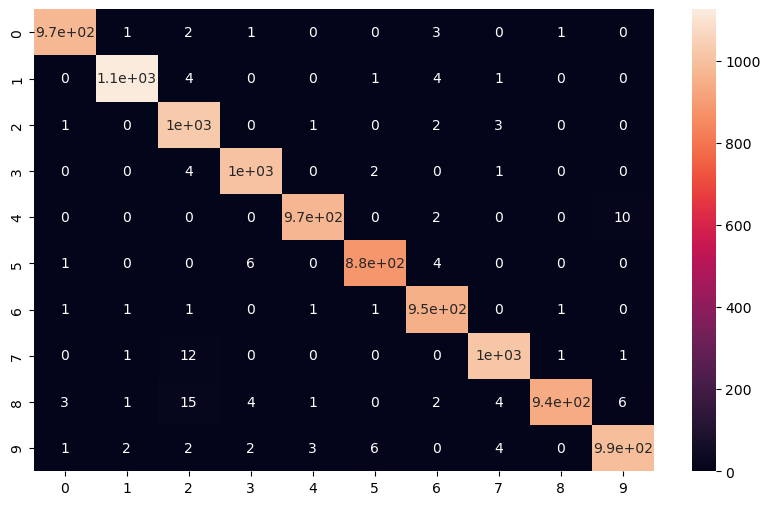

In [104]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predict an image

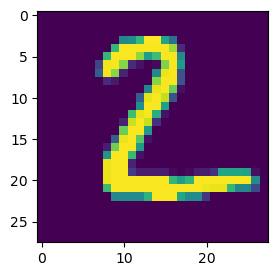

In [120]:
plt.figure(figsize=(3,3))
my_number = x_test[1]
plt.imshow(my_number.reshape(28,28))

In [113]:
# SHAPE --> (num_images,width,height,color_channels)
predictions = model.predict(my_number.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predictions, axis=1)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[2]


Looks like CNN performed well